In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
import random
import numpy as np
from matplotlib import pyplot as plt

/home/pedri0/anaconda3/envs/SIM/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:43: UserWarning: You are currently using a nightly version of TensorFlow (2.5.0-dev20201129). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  UserWarning,


In [2]:
def Squeeze(tensor):
    return tf.squeeze(tensor)
def Tensor(image):
    image = tf.keras.preprocessing.image.img_to_array(image)
    return tf.convert_to_tensor(image)
def Expand(tensor):
    return tf.expand_dims(tensor, axis=0)
def Image(tensor):
    tensor = Squeeze(tensor)
    tensor = tensor.numpy()
    return tf.keras.preprocessing.image.array_to_img(tensor)

In [3]:
transformations = []
image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')
image = Tensor(image)
image = Expand(image)
image = tf.image.central_crop(image, 0.5)

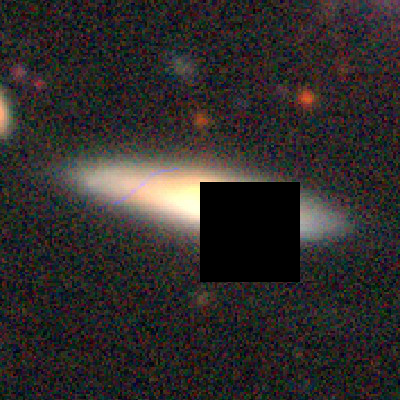

In [4]:
cutout = tfa.image.random_cutout(image, (100,100))
cutout = Image(cutout)
transformations.append(cutout)
cutout

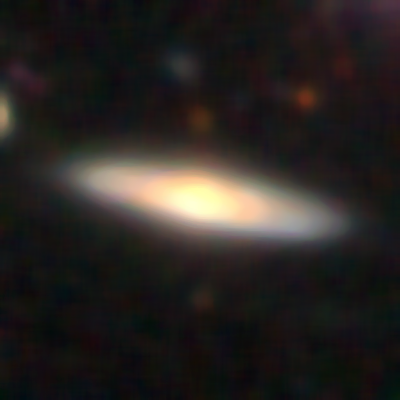

In [5]:
mean = tfa.image.median_filter2d(image, filter_shape=20)
mean = Image(mean)
transformations.append(mean)
mean

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


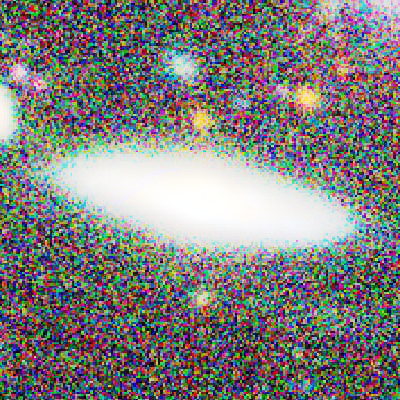

In [6]:
eq = tfa.image.equalize(image)
eq = Image(eq)
transformations.append(eq)
eq

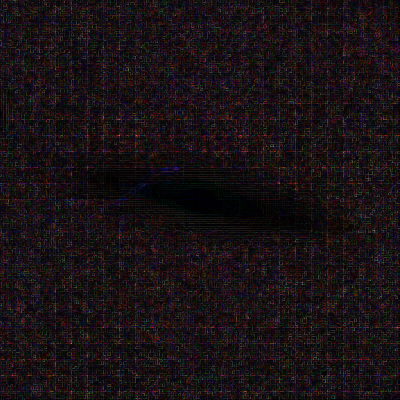

In [7]:
dx,dy = tf.image.image_gradients(image)
#dx = Image(dx)
#dy = Image(dy)
dx=tf.math.square(dx)
dy=tf.math.square(dy)
dev = tf.math.sqrt((dx+dy))
dev = Image(dev)
transformations.append(dev)
dev

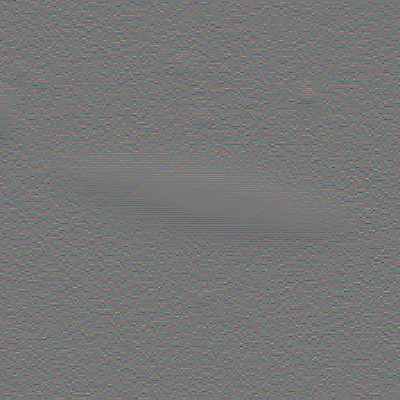

In [8]:
dx,dy = tf.image.image_gradients(image)
dx = Image(dx)
dy = Image(dy)
transformations.append(dx)
transformations.append(dy)
dx

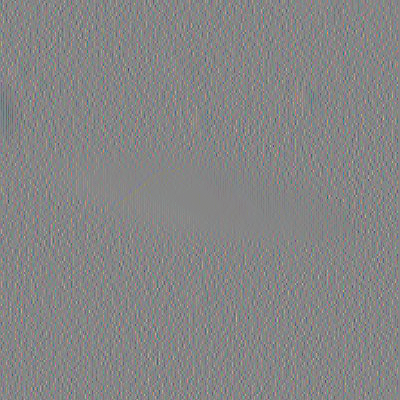

In [9]:
dy

In [10]:
names = ['Cutout', 'Filtro Mediana', 'Ecualizacion', 'Mag Sobel', 'Derivada en x', 'Derivada en y']

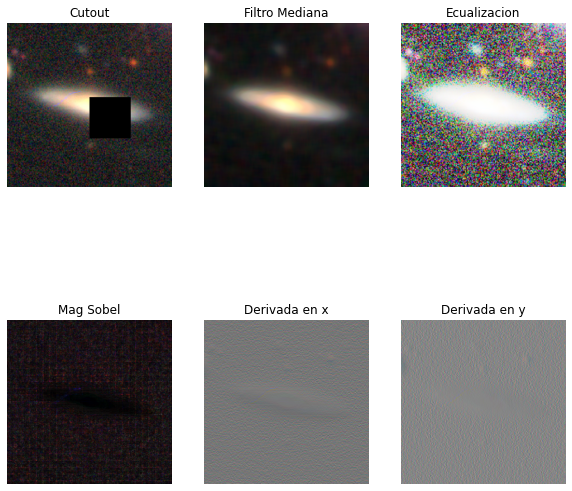

In [11]:
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(transformations[i])
  #label = label_batch[i]
  plt.title(names[i])
  plt.axis("off")
plt.savefig('transf.png')

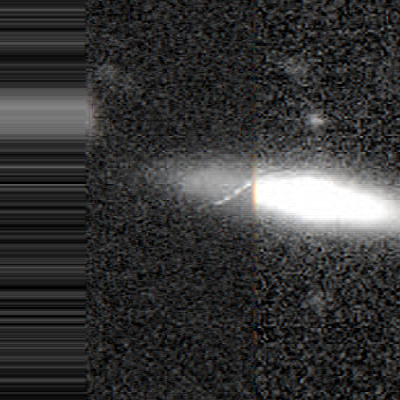

In [12]:
image = tf.keras.preprocessing.image.load_img('J000047.88+141639.1.jpg')
image = Tensor(image)
image = tf.image.central_crop(image, 0.5)
randomrot = tf.keras.preprocessing.image.random_rotation(image, rg=50)
randomrot = Image(randomrot)
randomrot

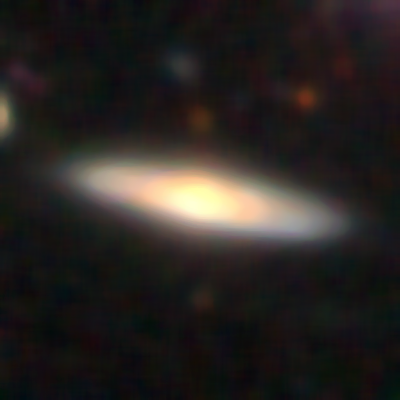

In [13]:
transformations[1]